In [84]:
import os

from scipy.io import loadmat
import ruptures as rpt

import numpy as np 

%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

In [149]:
def get_steps(x, time, thr=5, w=11):
    steps = [0]
    for i in range(x.shape[0]-1):
        if abs(x[i] - x[i+1]) > thr:
            steps.append(i)
            steps.append(i+1)
    steps.append(len(x)-1)
    print (steps)
    steps_n = []
    for i in range(0, len(steps), 2):
        if (steps[i+1] - steps[i]) > w:
            steps_n.append(steps[i])
            steps_n.append(steps[i+1])

    return steps_n

def get_ramps(x, time, thr=0.1, w=250):
    steps = [0]
    i = w//2
    while i < x.shape[0]-w//2:
        if np.std(x[i-w//2:i+w//2]) > thr:
            steps.append(i)
            i += 250
        else:
            i += 1
    
    return steps

In [246]:
noisy_data_dir  = '../../../datasets/Data_27012021_noisy/train_real/'
noisy_mats = os.listdir(noisy_data_dir)
noisy_mats.sort()

print (noisy_mats)

['OFVC4kW_LM10Hz_paliers_0to120PercTnom_Data.mat', 'OFVC4kW_LM20Hz_TorqueSteps_20190419_Data.mat', 'OFVC4kW_NoLM_SpeedVariations_20190419_Data.mat']


In [299]:
current_d = []
current_d_thres_locs = {}
current_q = []
current_q_thres_locs = {}
voltage_d = []
voltage_d_thres_locs = {}
voltage_q = []
voltage_q_thres_locs = {}
speed = []
speed_thres_locs = {}
torque = []
torque_thres_locs = {}

def get_stats(signal, locs, thres):
    stats = []
    thres_locs = []
    
    for loc in locs:
        stats.append([loc[2], np.std(signal[int(loc[0]): int(loc[1])] - loc[2])])
        if np.std(signal[int(loc[0]): int(loc[1])] - loc[2]) >= thres:
            thres_locs.append([int(loc[0]), int(loc[1]), loc[2]])

    return stats, thres_locs

for mat_file in noisy_mats:
    noisy_mat = loadmat(os.path.join(noisy_data_dir, mat_file))
    
    out = get_stats(noisy_mat['noisy_current_d'][0], noisy_mat['current_d_clean_statics'], 0.1)
    current_d += out[0]
    current_d_thres_locs[mat_file] = out[1]
    
    out = get_stats(noisy_mat['noisy_current_q'][0], noisy_mat['current_q_clean_statics'], 0.12)
    current_q += out[0]
    current_q_thres_locs[mat_file] = out[1]
    
    out = get_stats(noisy_mat['noisy_voltage_d'][0], noisy_mat['voltage_d_clean_statics'], 1)
    voltage_d += out[0]
    voltage_d_thres_locs[mat_file] = out[1]
    
    out = get_stats(noisy_mat['noisy_voltage_q'][0], noisy_mat['voltage_q_clean_statics'], 1)
    voltage_q += out[0]
    voltage_q_thres_locs[mat_file] = out[1]
    
    out = get_stats(noisy_mat['noisy_speed'][0], noisy_mat['speed_clean_statics'], 0.04)
    speed += out[0]
    speed_thres_locs[mat_file] = out[1]
    
    out = get_stats(noisy_mat['noisy_speed'][0], noisy_mat['torque_clean_statics'], 2)
    torque += out[0]
    torque_thres_locs[mat_file] = out[1]
    
current_d = np.asarray(current_d)
current_q = np.asarray(current_q)
voltage_d = np.asarray(voltage_d)
voltage_q = np.asarray(voltage_q)
speed = np.asarray(speed)
torque = np.asarray(torque)


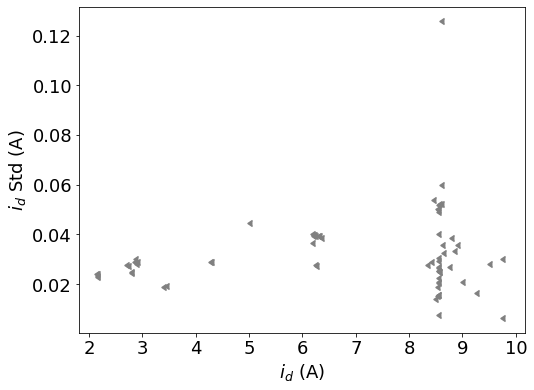

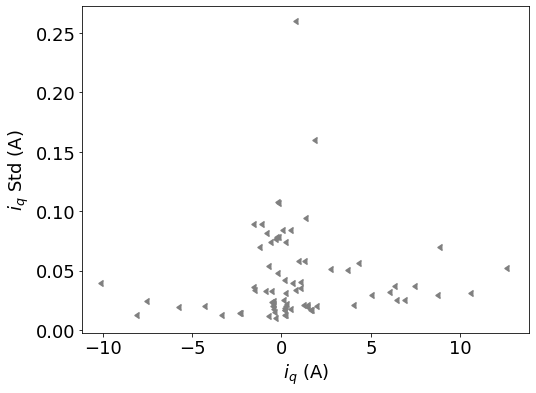

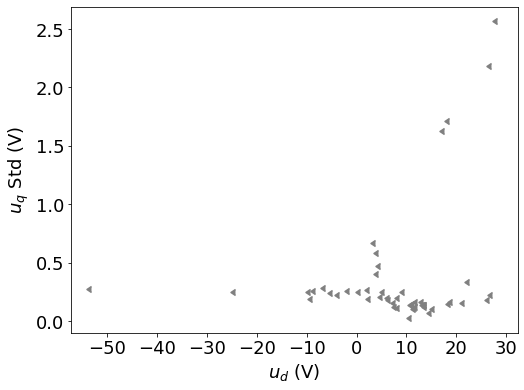

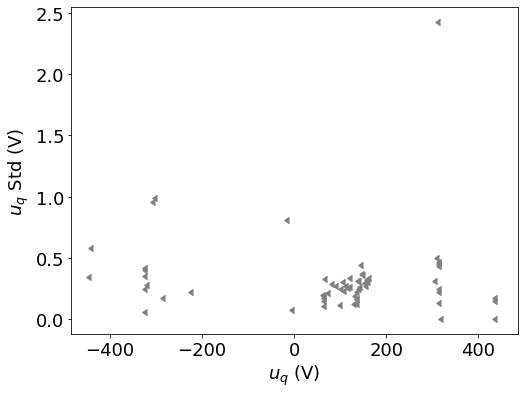

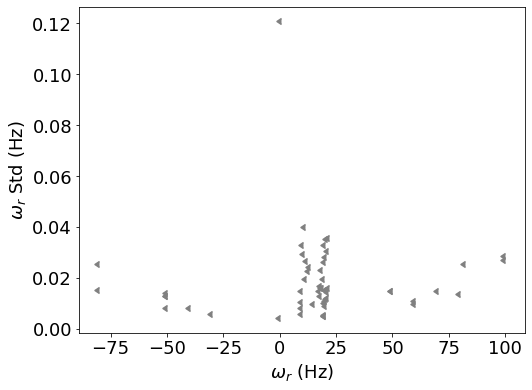

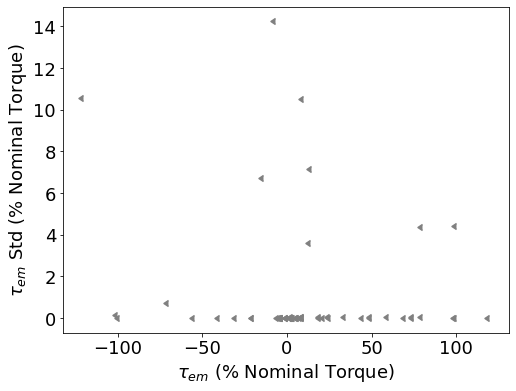

In [311]:
fig = plt.figure(figsize=(8,6))
plt.scatter(current_d[:, 0], current_d[:, 1], marker=8, color='gray')
plt.xlabel(r'$i_d$ (A)', fontsize=18)
plt.ylabel(r'$i_d$ Std (A)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('current_d_noise_stat.pdf', bbox_inches="tight", dpi=300, transparent=True)

fig = plt.figure(figsize=(8,6))
plt.scatter(current_q[:, 0], current_q[:, 1], marker=8, color='gray')
plt.xlabel(r'$i_q$ (A)', fontsize=18)
plt.ylabel(r'$i_q$ Std (A)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('current_q_noise_stat.pdf', bbox_inches="tight", dpi=300, transparent=True)

fig = plt.figure(figsize=(8,6))
plt.scatter(voltage_d[:, 0], voltage_d[:, 1], marker=8, color='gray')
plt.xlabel(r'$u_d$ (V)', fontsize=18)
plt.ylabel(r'$u_q$ Std (V)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('voltage_d_noise_stat.pdf', bbox_inches="tight", dpi=300, transparent=True)

fig = plt.figure(figsize=(8,6))
plt.scatter(voltage_q[:, 0], voltage_q[:, 1], marker=8, color='gray')
plt.xlabel(r'$u_q$ (V)', fontsize=18)
plt.ylabel(r'$u_q$ Std (V)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('votlage_q_noise_stat.pdf', bbox_inches="tight", dpi=300, transparent=True)

fig = plt.figure(figsize=(8,6))
plt.scatter(speed[:, 0], speed[:, 1], marker=8, color='gray')
plt.xlabel(r'$\omega_r$ (Hz)', fontsize=18)
plt.ylabel(r'$\omega_r$ Std (Hz)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('speed_noise_stat.pdf', bbox_inches="tight", dpi=300, transparent=True)

fig = plt.figure(figsize=(8,6))
plt.scatter(torque[:, 0], torque[:, 1], marker=8, color='gray')
plt.xlabel(r'$\tau_{em}$ (% Nominal Torque)', fontsize=18)
plt.ylabel(r'$\tau_{em}$ Std (% Nominal Torque)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('torque_noise_stat.pdf', bbox_inches="tight", dpi=300, transparent=True)

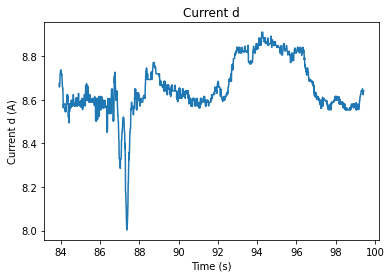

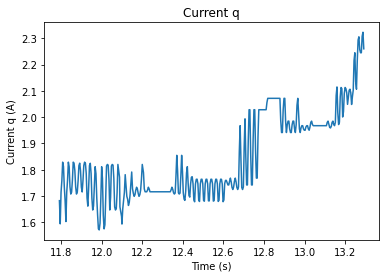

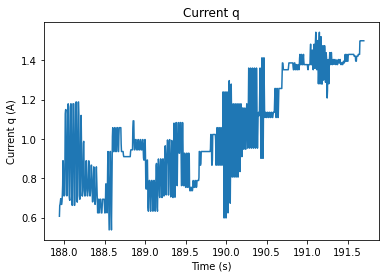

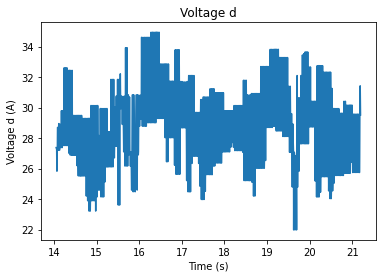

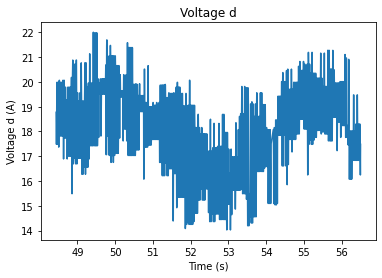

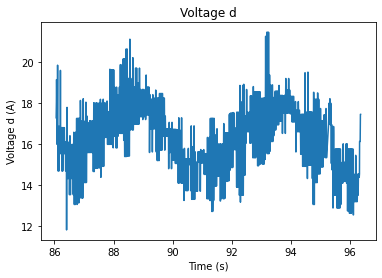

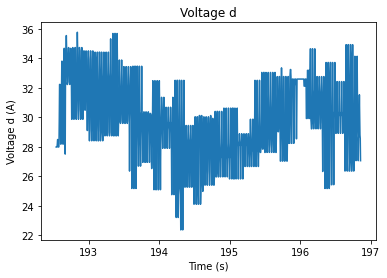

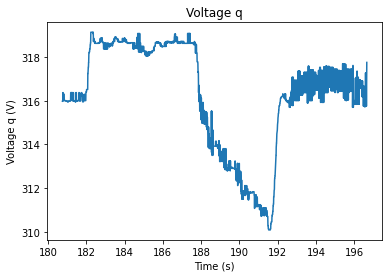

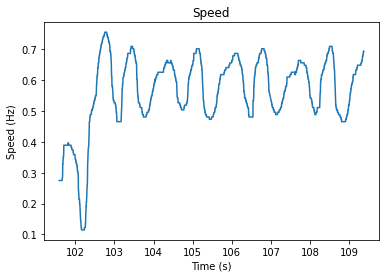

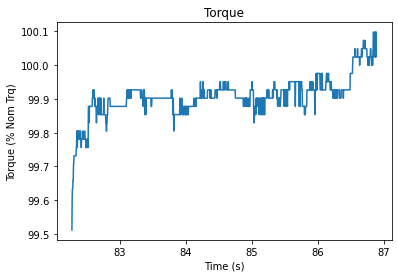

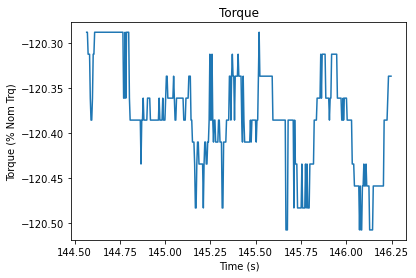

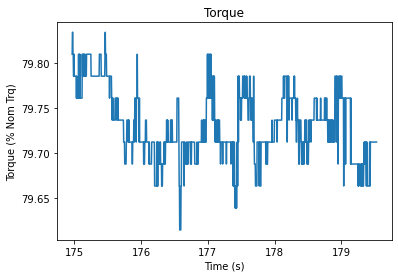

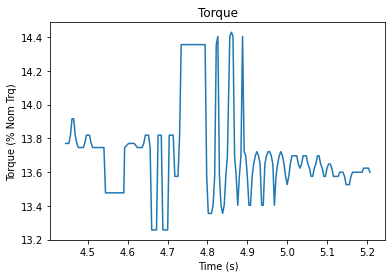

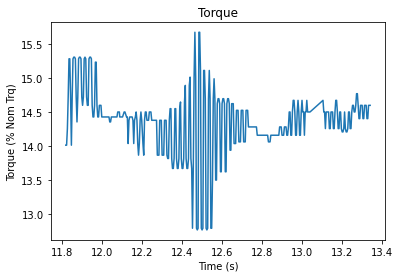

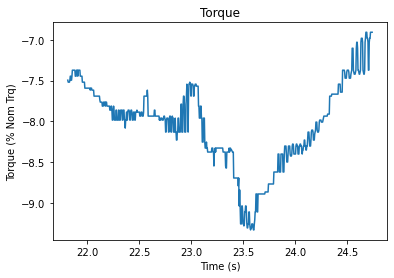

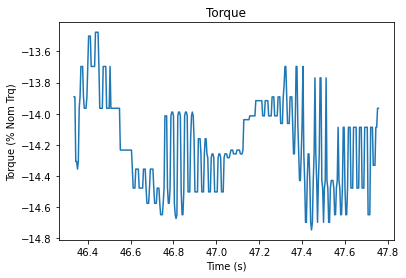

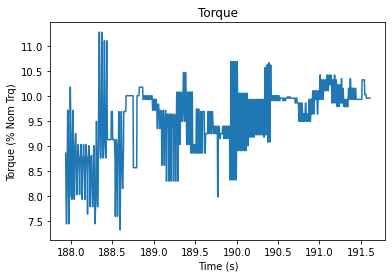

In [301]:
for k in current_d_thres_locs.keys():
    if len(current_d_thres_locs[k]) > 0:
        data = loadmat(os.path.join(noisy_data_dir, k))
        for item in current_d_thres_locs[k]:
            plt.plot(data['time'][0][int(item[0]): int(item[1])],
                     data['noisy_current_d'][0][int(item[0]): int(item[1])])
            plt.xlabel('Time (s)')
            plt.ylabel('Current d (A)')
            plt.title('Current d')
            plt.show()
            
for k in current_q_thres_locs.keys():
    if len(current_q_thres_locs[k]) > 0:
        data = loadmat(os.path.join(noisy_data_dir, k))
        for item in current_q_thres_locs[k]:
            plt.plot(data['time'][0][int(item[0]): int(item[1])],
                     data['noisy_current_q'][0][int(item[0]): int(item[1])])
            plt.xlabel('Time (s)')
            plt.ylabel('Current q (A)')
            plt.title('Current q')
            plt.show()
            
for k in voltage_d_thres_locs.keys():
    if len(voltage_d_thres_locs[k]) > 0:
        data = loadmat(os.path.join(noisy_data_dir, k))
        for item in voltage_d_thres_locs[k]:
            plt.plot(data['time'][0][int(item[0]): int(item[1])],
                     data['noisy_voltage_d'][0][int(item[0]): int(item[1])])
            plt.xlabel('Time (s)')
            plt.ylabel('Voltage d (A)')
            plt.title('Voltage d')
            plt.show()
            
for k in voltage_q_thres_locs.keys():
    if len(voltage_q_thres_locs[k]) > 0:
        data = loadmat(os.path.join(noisy_data_dir, k))
        for item in voltage_q_thres_locs[k]:
            plt.plot(data['time'][0][int(item[0]): int(item[1])],
                     data['noisy_voltage_q'][0][int(item[0]): int(item[1])])
            plt.xlabel('Time (s)')
            plt.ylabel('Voltage q (V)')
            plt.title('Voltage q')
            plt.show()
            
for k in speed_thres_locs.keys():
    if len(speed_thres_locs[k]) > 0:
        data = loadmat(os.path.join(noisy_data_dir, k))
        for item in speed_thres_locs[k]:
            plt.plot(data['time'][0][int(item[0]): int(item[1])],
                     data['noisy_speed'][0][int(item[0]): int(item[1])])
            plt.xlabel('Time (s)')
            plt.ylabel('Speed (Hz)')
            plt.title('Speed')
            plt.show()
            
for k in torque_thres_locs.keys():
    if len(torque_thres_locs[k]) > 0:
        data = loadmat(os.path.join(noisy_data_dir, k))
        for item in torque_thres_locs[k]:
            plt.plot(data['time'][0][int(item[0]): int(item[1])],
                     data['noisy_torque'][0][int(item[0]): int(item[1])])
            plt.xlabel('Time (s)')
            plt.ylabel('Torque (% Nom Trq)')
            plt.title('Torque')
            plt.show()

In [302]:
current_d_thres_locs, current_q_thres_locs, voltage_d_thres_locs, voltage_q_thres_locs, speed_thres_locs, torque_thres_locs

({'OFVC4kW_LM10Hz_paliers_0to120PercTnom_Data.mat': [],
  'OFVC4kW_LM20Hz_TorqueSteps_20190419_Data.mat': [[20858, 24716, 8.66]],
  'OFVC4kW_NoLM_SpeedVariations_20190419_Data.mat': []},
 {'OFVC4kW_LM10Hz_paliers_0to120PercTnom_Data.mat': [],
  'OFVC4kW_LM20Hz_TorqueSteps_20190419_Data.mat': [],
  'OFVC4kW_NoLM_SpeedVariations_20190419_Data.mat': [[2945, 3302, 2.0],
   [46798, 47742, 0.9]]},
 {'OFVC4kW_LM10Hz_paliers_0to120PercTnom_Data.mat': [],
  'OFVC4kW_LM20Hz_TorqueSteps_20190419_Data.mat': [],
  'OFVC4kW_NoLM_SpeedVariations_20190419_Data.mat': [[3491, 5272, 27.0],
   [12056, 14053, 18.5],
   [21420, 23977, 17.5],
   [47952, 49034, 28.2]]},
 {'OFVC4kW_LM10Hz_paliers_0to120PercTnom_Data.mat': [],
  'OFVC4kW_LM20Hz_TorqueSteps_20190419_Data.mat': [],
  'OFVC4kW_NoLM_SpeedVariations_20190419_Data.mat': [[45001, 48985, 316.5]]},
 {'OFVC4kW_LM10Hz_paliers_0to120PercTnom_Data.mat': [],
  'OFVC4kW_LM20Hz_TorqueSteps_20190419_Data.mat': [[25256, 27185, 0.5]],
  'OFVC4kW_NoLM_SpeedVariati